In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///../Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base=automap_base()


# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

inspector=inspect(engine)
columns=inspector.get_columns('measurement')
for c in columns:
    print (c['name'],c['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns=inspector.get_columns('station')
for c in columns:
    print (c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date


('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
precipitation_data=session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date>=dt.datetime(2016, 8, 23)).all()

# Calculate the date one year from the last date in data set.
last_year_date=dt.date(2017, 8, 23)-dt.timedelta(days=365)
print(f"date_last_year {last_year_date}")

# Perform a query to retrieve the data and precipitation scores
precipitation_data
    







date_last_year 2016-08-23


[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df=pd.DataFrame(precipitation_data,columns=['date','prcp'])
precipitation_dfr=precipitation_df.rename(columns={'prcp':'precipitation'})
precipitation_dfr['date']=pd.to_datetime(precipitation_dfr['date'])
prcp_date_index=precipitation_dfr.set_index('date')


# Sort the dataframe by date
prcp_date_index.sort_values('date')
prcp_date_index.fillna(0)

# prcp_date_index.info()

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,0.00
2017-08-21,0.56


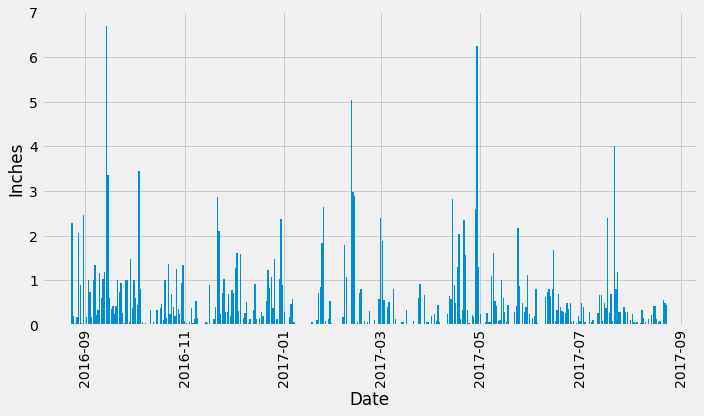

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data

fig, ax=plt.subplots(figsize=(10,6))
plt.bar(prcp_date_index.index,prcp_date_index['precipitation'].values)

plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data

quartiles = precipitation_dfr['precipitation'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 0.0
The upper quartile of temperatures is: 0.13
The interquartile range of temperatures is: 0.13
The the median of temperatures is: 0.02 
Values below -0.195 could be outliers.
Values above 0.325 could be outliers.


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
station_count=session.query(Measurement.station).group_by(Measurement.station).count()
print(station_count)

9


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
most_active_station=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
            order_by(Measurement.station.desc()).first()
print(f"Most active station : {most_active_station[0]} ")
# List the stations and the counts in descending order.
station_data=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
            order_by(Measurement.station.desc()).all()
station_data



Most active station : USC00519523 


[('USC00519523', 2669),
 ('USC00519397', 2724),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp=session.query(func.min(Measurement.tobs)).filter(Measurement.station==most_active_station[0]).all()
print(f'Lowest Temperature for {most_active_station[0]}: {lowest_temp}')

highest_temp=session.query(func.max(Measurement.tobs)).filter(Measurement.station==most_active_station[0]).all()
print(f'Highest Temperature for {most_active_station[0]}: {highest_temp}')

average_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.station==most_active_station[0]).all()
print(f'Average Temperature for {most_active_station[0]}: {average_temp}')

Lowest Temperature for USC00519523: [(56.0,)]
Highest Temperature for USC00519523: [(85.0,)]
Average Temperature for USC00519523: [(74.5436493068565,)]


In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temp=session.query(Measurement.tobs).filter((Measurement.station==most_active_station[0]),\
            (Measurement.date)>=dt.datetime(2016, 8, 23)).all()
most_active_temp_df=pd.DataFrame(most_active_temp,columns=['tobs'])
most_active_temp_df=most_active_temp_df.rename(columns=({'tobs':'Temperature'}))
most_active_temp_df1=most_active_temp_df.fillna(0)
most_active_temp_df1



,Temperature
0,79.0
1,80.0
2,84.0
3,81.0
4,80.0
...,...
331,83.0
332,85.0
333,82.0
334,82.0


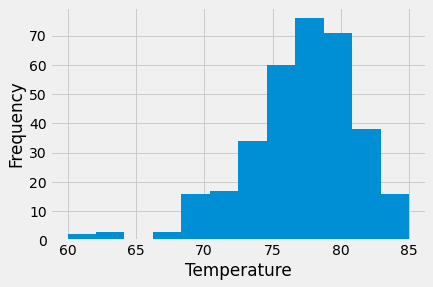

In [33]:
plt.hist(most_active_temp_df1['Temperature'].values,bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

# Close session

In [20]:
# Close Session
session.close()